In [2]:
#Here we import the packages we need.
#Please ensure that all the dependencies are already installed with !pip install 'package'
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.classification import GBTClassifier
#from pyspark.ml import Pipeline
#from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split






Using TensorFlow backend.


In [3]:
#Here we download the dataset from Kaggle
#https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

In [4]:
#We read the file with pandas and create one dataframe from it.
with open('sao-paulo-properties-april-2019.csv','r') as File:
    data = File.read()
df = pd.read_csv('sao-paulo-properties-april-2019.csv',names = None)

df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [5]:
#We check the integrity of our dataset.
#This will create a different data frame with true or false values.
missing_data = df.isnull()

#Counting the missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Price
False    13640
Name: Price, dtype: int64

Condo
False    13640
Name: Condo, dtype: int64

Size
False    13640
Name: Size, dtype: int64

Rooms
False    13640
Name: Rooms, dtype: int64

Toilets
False    13640
Name: Toilets, dtype: int64

Suites
False    13640
Name: Suites, dtype: int64

Parking
False    13640
Name: Parking, dtype: int64

Elevator
False    13640
Name: Elevator, dtype: int64

Furnished
False    13640
Name: Furnished, dtype: int64

Swimming Pool
False    13640
Name: Swimming Pool, dtype: int64

New
False    13640
Name: New, dtype: int64

District
False    13640
Name: District, dtype: int64

Negotiation_Type
False    13640
Name: Negotiation_Type, dtype: int64

Property_Type
False    13640
Name: Property_Type, dtype: int64

Latitude
False    13640
Name: Latitude, dtype: int64

Longitude
False    13640
Name: Longitude, dtype: int64



In [6]:
#This is to see how are the types of our collumns
df.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation_Type     object
Property_Type        object
Latitude            float64
Longitude           float64
dtype: object

In [7]:
#Lets breake down the Negotiation Type column into true or false with different columns for it's values.
#So we can have batter information with the correlation between the negotiations.
#We do this by creating one dummy variable.
dummy_variable_1 = pd.get_dummies(df["Negotiation_Type"])
dummy_variable_1.head()


,rent,sale
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
dummy_variable_1.rename(columns={'Negotiation Type Detail':'Sale', 'Negotiation Type Detail':'Rent'}, inplace=True)
dummy_variable_1.head()

,rent,sale
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [9]:
#Let's concatenate our results to our table.
df = pd.concat([df, dummy_variable_1], axis=1)

In [10]:
#Let's drop our original column, as we dont need it anymore.
#df.drop("Negotiation Type", axis = 1, inplace=True)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

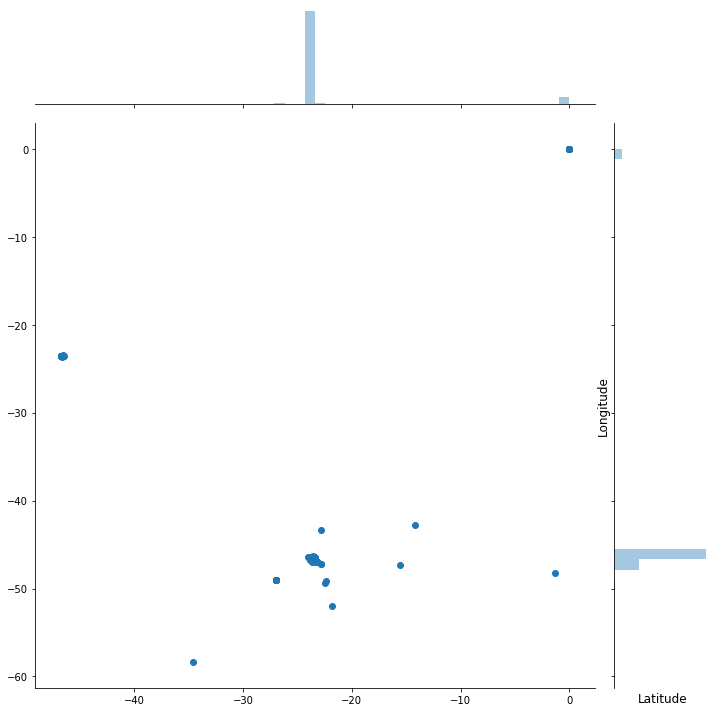

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
#Here we can visualize where our houses are place in the sate of São Paulo.
#This is important so we can see which is the location we have more data.
plt.figure(figsize=(10,10))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine


(0, 922.6408559869685)

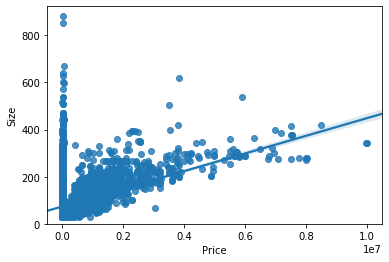

In [12]:
#Some examples of linear regression between the dataset:
sns.regplot(x= "Price",y= "Size",data=df)
plt.ylim(0,)

In [13]:
#We can check for the integrity of the dataset, check for anomalies...or missing values.
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,rent,sale
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088,0.529912,0.470088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288,0.499123,0.499123
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352,0.000000,0.000000
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671,0.000000,0.000000
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255,1.000000,0.000000
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040,1.000000,1.000000
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,1.000000


In [14]:
#Whith this table we can identify the features that has a good correlation between them.
#so we can later on decide which ones to use in our model.
df.corr()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,rent,sale
Price,1.000000,0.203857,0.378450,0.272267,0.341887,0.313267,0.337959,0.102495,-0.006385,0.131494,0.033812,-0.021678,-0.024897,-0.511562,0.511562
Condo,0.203857,1.000000,0.761019,0.451355,0.543094,0.535896,0.632137,0.000779,0.101748,0.157123,-0.082479,-0.029288,-0.032258,0.189626,-0.189626
Size,0.378450,0.761019,1.000000,0.663280,0.684416,0.675828,0.741757,0.012513,0.033325,0.130841,-0.046182,-0.035356,-0.038486,0.092889,-0.092889
Rooms,0.272267,0.451355,0.663280,1.000000,0.554324,0.527250,0.589587,0.035810,-0.054274,0.161721,-0.010999,-0.049751,-0.051009,-0.010639,0.010639
Toilets,0.341887,0.543094,0.684416,0.554324,1.000000,0.910445,0.694664,0.178360,0.078729,0.263564,-0.028709,-0.135492,-0.137089,0.035195,-0.035195
Suites,0.313267,0.535896,0.675828,0.527250,0.910445,1.000000,0.704515,0.140794,0.072325,0.266896,-0.040307,-0.138138,-0.139654,0.055570,-0.055570
Parking,0.337959,0.632137,0.741757,0.589587,0.694664,0.704515,1.000000,0.053850,0.080594,0.293948,-0.024046,-0.060613,-0.062953,0.075592,-0.075592
Elevator,0.102495,0.000779,0.012513,0.035810,0.178360,0.140794,0.053850,1.000000,0.066680,0.204461,0.170077,-0.127179,-0.121063,-0.120705,0.120705
Furnished,-0.006385,0.101748,0.033325,-0.054274,0.078729,0.072325,0.080594,0.066680,1.000000,0.146984,-0.045555,-0.018098,-0.016798,0.078499,-0.078499
Swimming Pool,0.131494,0.157123,0.130841,0.161721,0.263564,0.266896,0.293948,0.204461,0.146984,1.000000,0.006989,-0.038082,-0.035105,-0.051417,0.051417


In [15]:
#Correlation alone isn't enought we can use the P-value to help identify if this correlation is really significant or not.
pearson_coef, p_value = stats.pearsonr(df['Condo'], df['Size'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7610191601474413  with a P-value of P = 0.0


Good correlation to use later in the model is:
>Condo vs Size
Condo vs Parking
Suites vs Toilets
Not so strong:
Price vs Size

In [16]:
#We can also check how different values correlate with each other using ANOVA statisc method.
#Let's group up some tables
df_gptest = df[['District','Size','Price']]
grouped_test1 = df_gptest.groupby(['District','Size'],as_index=False).mean()
grouped_test1

,District,Size,Price
0,Alto de Pinheiros/São Paulo,30,5.557000e+05
1,Alto de Pinheiros/São Paulo,33,3.500000e+03
2,Alto de Pinheiros/São Paulo,34,1.953333e+05
3,Alto de Pinheiros/São Paulo,43,5.000000e+03
4,Alto de Pinheiros/São Paulo,49,4.825000e+05
5,Alto de Pinheiros/São Paulo,56,4.394930e+05
6,Alto de Pinheiros/São Paulo,57,1.900000e+03
7,Alto de Pinheiros/São Paulo,58,2.600000e+03
8,Alto de Pinheiros/São Paulo,60,4.800000e+05
9,Alto de Pinheiros/São Paulo,63,3.089333e+05


In [17]:
grouped_test2=df_gptest[['District', 'Price']].groupby(['District'])
grouped_test2.head(2)

,District,Price
0,Artur Alvim/São Paulo,930
1,Artur Alvim/São Paulo,1000
14,Belém/São Paulo,1800
15,Belém/São Paulo,1600
49,Cangaíba/São Paulo,1200
50,Cangaíba/São Paulo,1450
79,Carrão/São Paulo,1860
80,Carrão/São Paulo,1400
115,Cidade Líder/São Paulo,1300
116,Cidade Líder/São Paulo,850


In [18]:
df_gptest

,District,Size,Price
0,Artur Alvim/São Paulo,47,930
1,Artur Alvim/São Paulo,45,1000
2,Artur Alvim/São Paulo,48,1000
3,Artur Alvim/São Paulo,48,1000
4,Artur Alvim/São Paulo,55,1300
5,Artur Alvim/São Paulo,50,1170
6,Artur Alvim/São Paulo,52,1000
7,Artur Alvim/São Paulo,40,900
8,Artur Alvim/São Paulo,65,1000
9,Artur Alvim/São Paulo,100,1000


In [19]:
#We can obtain the values of the method group using the method "get_group".
grouped_test2.get_group('Belém/São Paulo')['Price']

14         1800
15         1600
16         1500
17         1600
18         1600
          ...  
12596    333000
12597    400000
12598    560000
12599    360000
12600    385000
Name: Price, Length: 205, dtype: int64

In [20]:
#we can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value together.
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Jabaquara/São Paulo')['Price'], grouped_test2.get_group('Belém/São Paulo')['Price'], grouped_test2.get_group('Artur Alvim/São Paulo')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 25.657703926040785 , P = 2.216975623562434e-11


In [21]:
#We can try to one hot encode the column distric, So we can add more data to help the prediction.


In [22]:
#Using this method we can identify that if we classify our district in larger regions for the city, 
#we could get a better value. With these we got a not so high F test and not so small P test
#But from common sense we know that the regions of a city directly impact on prices for rent/sale. 
#so some work is well done here

# Conclusion: Important Variables

Here we can save a list of our important variables that affect the rent or sale of a building
<ul>
    <li>Condo</li>
    <li>Size</li>
    <li>Parking</li>
    <li>Suites</li>
    <li>Toilets</li>
Not so strong, but as common sense we know they are effective. Price over Size
</ul>


### Steps to improve the model and focus only to predict the price for rent, not sale.

After some tests with the API and data for real rent appartments I figure out that I need to improve the quality of my data and train the model aggain, so maybe acchieve a better score and better preddictions.

In [23]:
#Let's try and remove the data which contains the price for selling appartments.
#This way we don't use this data for training.

df1 = df[df.Negotiation_Type != 'sale']
df1.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude,rent,sale
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,1,0
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,1,0
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,1,0
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014,1,0
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436,1,0


In [24]:
df2 = df1[['Price','Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool',
        'New']]
df2.shape

(7228, 11)

In [58]:

Y = df2.Price
X = df2[['Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool',
        'New']]

# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value
# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)


Shape of X Train:	 (5782, 10)
Shape of X Test:	 (1446, 10)
Shape of Y Train:	 (5782,)
Shape of Y Test:	 (1446,)


In [59]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()
#Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(10,)))
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(7, activation='relu'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(5, activation='relu'))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(3, activation='relu'))
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1))
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='adam', loss='mse')

In [60]:
model.fit(X_train,Y_train,
         validation_data=(X_test,Y_test),
         epochs=20,
         batch_size=30)

Train on 5782 samples, validate on 1446 samples
Epoch 1/20
5782/5782 [==============================] - 2s 381us/sample - loss: 21845591.4010 - val_loss: 21923532.6349
Epoch 2/20
5782/5782 [==============================] - 1s 246us/sample - loss: 21589835.2006 - val_loss: 21043993.0000
Epoch 3/20
5782/5782 [==============================] - 1s 213us/sample - loss: 18299272.4705 - val_loss: 13648206.1623
Epoch 4/20
5782/5782 [==============================] - 1s 256us/sample - loss: 9689962.7695 - val_loss: 6329773.6745
Epoch 5/20
5782/5782 [==============================] - 1s 185us/sample - loss: 6781252.2533 - val_loss: 5561493.0620
Epoch 6/20
5782/5782 [==============================] - 1s 179us/sample - loss: 6363514.4252 - val_loss: 5374893.2095
Epoch 7/20
5782/5782 [==============================] - 2s 326us/sample - loss: 6430515.5229 - val_loss: 5295352.6146
Epoch 8/20
5782/5782 [==============================] - 1s 251us/sample - loss: 6147266.6042 - val_loss: 5224096.4782
Ep

In [62]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [63]:
from sklearn import metrics
# Accuracy of Training and Testing data set
print("Accuracy of Training data set:\t",round(metrics.r2_score(Y_train,predict_train),3))
print("Accuracy of Testing data set:\t",round(metrics.r2_score(Y_test,predict_test),3))

Accuracy of Training data set:	 0.599
Accuracy of Testing data set:	 0.596


In [26]:
#Lets create one linear regression on the Price. This way we can tell if a person
#is paying the correct value for the deal.
#Try to use LN1 and LN2 parameters.
reg = LinearRegression()
labels = df2.Price
features = df2.drop(['Price'],axis=1)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features,labels,test_size = 0.25,random_state=2, shuffle = True)
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
reg.score(x_test,y_test)

0.6047316514834613

In [28]:
#Lets try to check if we can predict a higher score with KNN.
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [29]:
knn.score(x_test,y_test)

0.10514665190924184

In [30]:
#Let's try to implement the Logistic Regression to check our score as well.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=None, solver='liblinear',multi_class='ovr').fit(x_train, y_train)

In [31]:
lr.score(x_test, y_test)

0.07470946319867183

In [32]:
#Lets look and make sure we did the model correctly.
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)
df1.shape

Training Features Shape: (5421, 10)
Training Labels Shape: (5421,)
Testing Features Shape: (1807, 10)
Testing Labels Shape: (1807,)


(7228, 18)

In [33]:
#From these result we can tell that our model is close to predict the right price, but still some tasks to make to improve it.
#Lets try to implement gradient boost model on it.

clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth =5, min_samples_split = 2,
                                        learning_rate= 0.1,loss = 'lad',)
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
clf.score(x_test,y_test)

0.6086962137473112

In [35]:
#we achieved a better number with gradient booster.

In [36]:
rf = RandomForestRegressor(n_estimators = 400, random_state = 2)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [37]:
rf.score(x_test,y_test)

0.6171598240492576

In [38]:
#With such small test scores I found out the my dataset might need be preprocessed. So the linear training might get better score
from sklearn import preprocessing


X = df2
Y = df2.drop(['Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool',
        'New'],axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
#Great, our dataset is preprocessed, so the values are better close to each other in binary way.
X_scale

array([[0.00908724, 0.02315789, 0.02      , ..., 0.        , 0.        ,
        0.        ],
       [0.01050081, 0.01557895, 0.01764706, ..., 0.        , 0.        ,
        0.        ],
       [0.01050081, 0.01052632, 0.02117647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06704362, 0.07473684, 0.02941176, ..., 1.        , 1.        ,
        0.        ],
       [0.09127625, 0.24778947, 0.20588235, ..., 0.        , 0.        ,
        0.        ],
       [0.30533118, 0.24210526, 0.15529412, ..., 0.        , 1.        ,
        0.        ]])

In [40]:
#Training and testing Data:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#Evaluation Data
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [41]:
df2.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
0,930,220,47,2,2,1,1,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,0


In [42]:
#Let's turn our data back to a dataframe.
X_train_df = pd.DataFrame(data=X_train[1:,1:],index=X_train[1:,0],columns=['Condo','Size','Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming Pool',
        'New'])

In [43]:
X_train_df

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
0.050889,0.177895,0.127059,0.222222,0.142857,0.2,0.111111,0.0,0.0,0.0,0.0
0.068053,0.221053,0.072941,0.111111,0.285714,0.2,0.222222,0.0,1.0,0.0,0.0
0.014338,0.058421,0.047059,0.222222,0.142857,0.2,0.111111,0.0,0.0,1.0,0.0
0.054927,0.052632,0.012941,0.000000,0.142857,0.2,0.111111,0.0,1.0,1.0,0.0
0.071082,0.161158,0.141176,0.222222,0.428571,0.6,0.333333,0.0,0.0,1.0,0.0
0.046850,0.047368,0.050588,0.111111,0.142857,0.2,0.111111,0.0,0.0,1.0,0.0
0.020598,0.057895,0.027059,0.111111,0.142857,0.2,0.222222,0.0,1.0,1.0,0.0
0.252827,0.226632,0.268235,0.222222,0.428571,0.6,0.444444,0.0,1.0,0.0,0.0
0.161955,0.257895,0.191765,0.222222,0.428571,0.6,0.000000,0.0,0.0,0.0,0.0
0.013934,0.000000,0.023529,0.111111,0.142857,0.2,0.111111,0.0,0.0,0.0,0.0


In [44]:
#We are going to use one activation layer, two hidden layers and the one output layer of one shape. 
model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

#compile our model:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 5059 samples, validate on 1084 samples
Epoch 1/100
5059/5059 [==============================] - 2s 310us/step - loss: -47823.3197 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 2/100
5059/5059 [==============================] - 1s 211us/step - loss: -48107.9748 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 3/100
5059/5059 [==============================] - 1s 206us/step - loss: -48107.9749 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 4/100
5059/5059 [==============================] - 1s 197us/step - loss: -48107.9747 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 5/100
5059/5059 [==============================] - 1s 142us/step - loss: -48107.9748 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 6/100
5059/5059 [==============================] - 1s 138us/step - loss: -48107.9746 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 7/100
5059/5059 

5059/5059 [==============================] - 0s 91us/step - loss: -48107.9746 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 54/100
5059/5059 [==============================] - 1s 114us/step - loss: -48107.9749 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 55/100
5059/5059 [==============================] - 0s 86us/step - loss: -48107.9750 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 56/100
5059/5059 [==============================] - 1s 118us/step - loss: -48107.9748 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 57/100
5059/5059 [==============================] - 1s 112us/step - loss: -48107.9747 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 58/100
5059/5059 [==============================] - 1s 116us/step - loss: -48107.9749 - acc: 0.0000e+00 - val_loss: -51472.0770 - val_acc: 0.0000e+00
Epoch 59/100
5059/5059 [==============================] - 0s 89us/step - loss: 

In [46]:
#Lets save our model, so we can use later on with API.

joblib.dump(rf, 'model.pkl')

['model.pkl']

In [47]:
#Lets save our model columns to use it later on API
model_columns = list(x_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [48]:
with open('thanks_wc.txt','r') as File:
    data = File.read()
#    escrever = File.write()

In [49]:
from wordcloud import WordCloud, STOPWORDS

thank_txt = open('thanks_wc.txt', 'r').read()

stopwords = set(STOPWORDS)

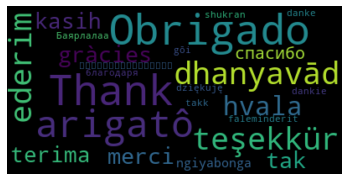

In [50]:
thank_wc = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(thank_txt)
plt.figure()
plt.imshow(thank_wc, interpolation="bilinear")
plt.axis("off")
plt.show()